<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




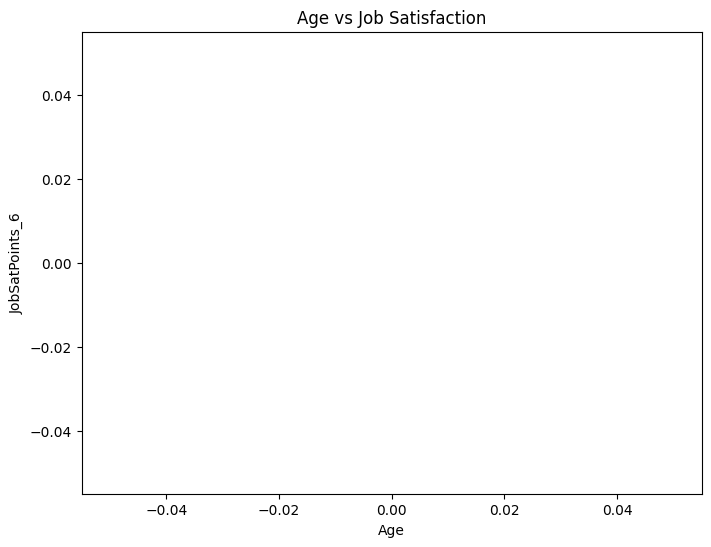

In [3]:
## Write your code here
df_plot = df[["Age", "JobSatPoints_6"]].copy()
df_plot["Age"] = pd.to_numeric(df_plot["Age"], errors="coerce")
df_plot["JobSatPoints_6"] = pd.to_numeric(df_plot["JobSatPoints_6"], errors="coerce")
df_plot = df_plot.dropna()

plt.figure(figsize=(8,6))
plt.scatter(df_plot["Age"], df_plot["JobSatPoints_6"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("JobSatPoints_6")
plt.title("Age vs Job Satisfaction")
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


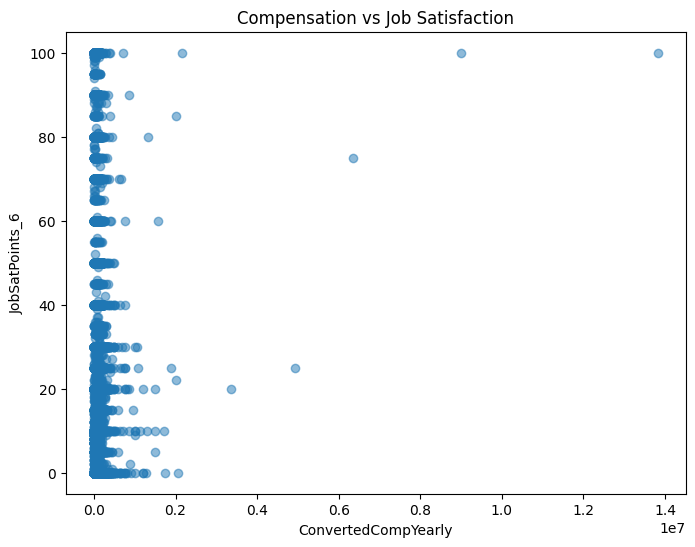

In [4]:
## Write your code here
df_plot = df[["ConvertedCompYearly", "JobSatPoints_6"]].copy()
df_plot["ConvertedCompYearly"] = pd.to_numeric(df_plot["ConvertedCompYearly"], errors="coerce")
df_plot["JobSatPoints_6"] = pd.to_numeric(df_plot["JobSatPoints_6"], errors="coerce")
df_plot = df_plot.dropna()

plt.figure(figsize=(8,6))
plt.scatter(df_plot["ConvertedCompYearly"], df_plot["JobSatPoints_6"], alpha=0.5)
plt.xlabel("ConvertedCompYearly")
plt.ylabel("JobSatPoints_6")
plt.title("Compensation vs Job Satisfaction")
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


TypeError: expected non-empty vector for x

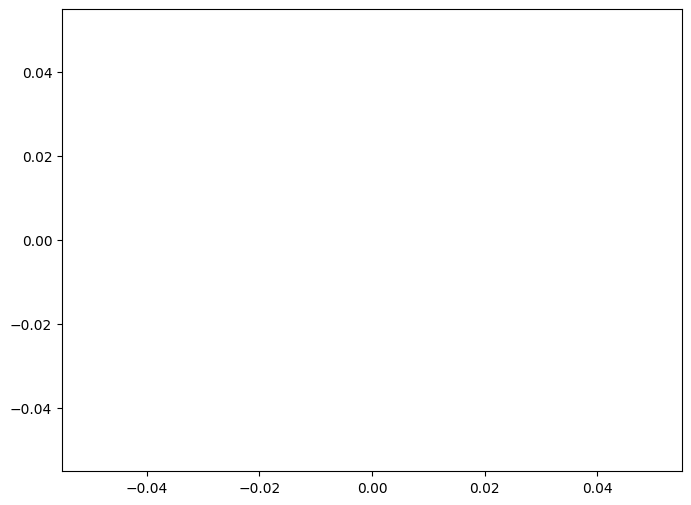

In [5]:
## Write your code here
df_plot = df[["Age", "JobSatPoints_6"]].copy()
df_plot["Age"] = pd.to_numeric(df_plot["Age"], errors="coerce")
df_plot["JobSatPoints_6"] = pd.to_numeric(df_plot["JobSatPoints_6"], errors="coerce")
df_plot = df_plot.dropna()
x = df_plot["Age"]
y = df_plot["JobSatPoints_6"]

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.5)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel("Age")
plt.ylabel("JobSatPoints_6")
plt.title("Age vs Job Satisfaction with Trend Line")
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


In [ ]:
## Write your code here
df_plot = df[["Age", "YearsCodePro"]].copy()
df_plot["Age"] = pd.to_numeric(df_plot["Age"], errors="coerce")
df_plot["YearsCodePro"] = pd.to_numeric(df_plot["YearsCodePro"], errors="coerce")
df_plot = df_plot.dropna()

plt.figure(figsize=(8,6))
plt.scatter(df_plot["Age"], df_plot["YearsCodePro"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("YearsCodePro")
plt.title("Age vs YearsCodePro")
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


In [ ]:
## Write your code here
df_plot = df[["ConvertedCompYearly", "JobSatPoints_6", "Age"]].copy()
df_plot["ConvertedCompYearly"] = pd.to_numeric(df_plot["ConvertedCompYearly"], errors="coerce")
df_plot["JobSatPoints_6"] = pd.to_numeric(df_plot["JobSatPoints_6"], errors="coerce")
df_plot["Age"] = pd.to_numeric(df_plot["Age"], errors="coerce")
df_plot = df_plot.dropna()
plt.figure(figsize=(8,6))
plt.scatter(
    df_plot["ConvertedCompYearly"],
    df_plot["JobSatPoints_6"],
    s=df_plot["Age"]*2,
    alpha=0.4)

plt.xlabel("ConvertedCompYearly")
plt.ylabel("JobSatPoints_6")
plt.title("Bubble Plot: Compensation vs Job Satisfaction (Size = Age)")
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [ ]:
## Write your code here
df_lang = df[["LanguageHaveWorkedWith", "JobSatPoints_6"]].copy()
df_lang["JobSatPoints_6"] = pd.to_numeric(df_lang["JobSatPoints_6"], errors="coerce")
df_lang = df_lang.dropna()
df_lang["LanguageHaveWorkedWith"] = df_lang["LanguageHaveWorkedWith"].str.split(";")
df_lang = df_lang.explode("LanguageHaveWorkedWith")
top_langs = df_lang["LanguageHaveWorkedWith"].value_counts().head(5).index
df_lang = df_lang[df_lang["LanguageHaveWorkedWith"].isin(top_langs)]
grouped = df_lang.groupby("LanguageHaveWorkedWith")["JobSatPoints_6"].mean()

plt.figure(figsize=(8,6))
plt.scatter(grouped.index, grouped.values)
plt.xticks(rotation=45)
plt.xlabel("Language")
plt.ylabel("Average JobSatPoints_6")
plt.title("Top 5 Languages vs Average Job Satisfaction")
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [ ]:
## Write your code here
df_plot = df[["ConvertedCompYearly", "JobSatPoints_6", "Employment"]].copy()
df_plot["ConvertedCompYearly"] = pd.to_numeric(df_plot["ConvertedCompYearly"], errors="coerce")
df_plot["JobSatPoints_6"] = pd.to_numeric(df_plot["JobSatPoints_6"], errors="coerce")
df_plot = df_plot.dropna()
top_emp = df_plot["Employment"].value_counts().head(3).index
plt.figure(figsize=(8,6))
for emp in top_emp:
    subset = df_plot[df_plot["Employment"] == emp]
    plt.scatter(
        subset["ConvertedCompYearly"],
        subset["JobSatPoints_6"],
        alpha=0.4,
        label=emp)

plt.xlabel("ConvertedCompYearly")
plt.ylabel("JobSatPoints_6")
plt.title("Compensation vs Job Satisfaction by Employment")
plt.legend()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
## Write your code here
df_plot = df[["YearsCodePro", "Age", "Country"]].copy()
df_plot["YearsCodePro"] = pd.to_numeric(df_plot["YearsCodePro"], errors="coerce")
df_plot["Age"] = pd.to_numeric(df_plot["Age"], errors="coerce")
df_plot = df_plot.dropna()
top_countries = df_plot["Country"].value_counts().head(3).index
df_plot = df_plot[df_plot["Country"].isin(top_countries)]
plt.figure(figsize=(8,6))
for country in top_countries:
    subset = df_plot[df_plot["Country"] == country]
    plt.scatter(
        subset["Age"],
        subset["YearsCodePro"],
        alpha=0.4,
        label=country)

plt.xlabel("Age")
plt.ylabel("YearsCodePro")
plt.title("YearsCodePro vs Age by Country")
plt.legend()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
